In [173]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [360]:
def function(x):
    return np.sin(x)

In [361]:

def update_velocity(particles, velocity, pbest, gbest):
    
    r1 = np.random.uniform(0, 1)
    r2 = np.random.uniform(0, 1)
    inertia = w * velocity
    cognitive = c1 * r1 * (pbest - particles)
    social = c2 * r2 * (gbest - particles)
    new_velocity = inertia + cognitive + social

    idx = np.where(new_velocity > vmax)
    new_velocity[idx] = vmax
    idx = np.where(new_velocity < -vmax)
    new_velocity[idx] = -vmax

    return new_velocity




In [362]:
def update_position(particles, velocity):
    new_particles = particles + velocity
    idx = np.where(new_particles > x_sup)
    new_particles[idx] = x_sup
    idx = np.where(new_particles < x_inf)
    new_particles[idx] = x_inf

    return new_particles


In [363]:
def update_best(pbest, gbest, particles):
    obj = function(particles)
    if obj.min() < function(gbest):
        gbest = particles[np.argmin(obj)]

    idx = np.where(obj < function(pbest))
    pbest[idx] = particles[idx]
    return pbest, gbest
    

In [364]:
c1, c2, w, k = 1, 1.5, 0.8, 0.7
T = 10
N = 20
x_inf = -5
x_sup = 5
vmax = k*(x_sup - x_inf)/2

In [365]:
particles = np.random.uniform(x_inf, x_sup, N)
velocity = np.zeros_like(particles)
pbest = np.copy(particles)
gbest = pbest[np.argmin(function(pbest))]
dynamic = [np.copy(particles)]
    

In [366]:

def run_pso(T):

    particles = np.random.uniform(x_inf, x_sup, N)
    velocity = np.zeros_like(particles)
    pbest = np.copy(particles)
    gbest = pbest[np.argmin(function(pbest))]
    dynamic = [np.copy(particles)]

    for _ in range(T):
    
        velocity = update_velocity(particles, velocity, pbest, gbest)
        particles = update_position(particles, velocity) 
        dynamic.append(np.copy(particles))
        pbest, gbest = update_best(pbest, gbest, particles)

    return gbest



<function matplotlib.pyplot.show(close=None, block=None)>

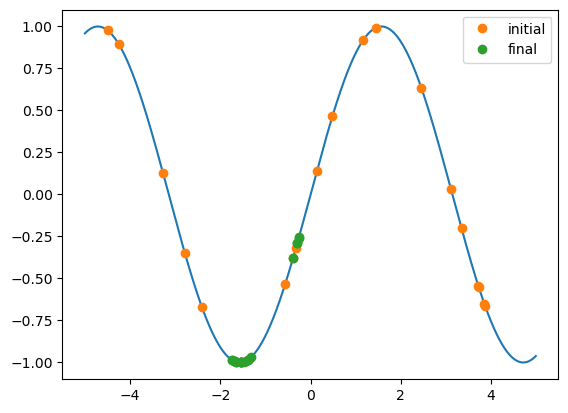

In [371]:
x1 = np.arange(x_inf, x_sup, 0.01)
plt.plot(x1, function(x1))
plt.plot(dynamic[0], function(dynamic[0]), marker='o', ls = '', label = 'initial')
plt.plot(dynamic[-1], function(dynamic[-1]), marker='o', ls = '', label = 'final')
plt.legend()
plt.show